In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Bad key "text.kerning_factor" on line 4 in
C:\Users\enes_\anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Linear Regression with Light GBM

In [2]:
x=pd.read_csv("house_features_for_model.csv")
y=pd.read_csv("house_prices_for_model.csv")

In [3]:
from sklearn.model_selection import train_test_split
xtr, xte, ytr, yte = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [5]:
import lightgbm as lgb

In [6]:
d_train= lgb.Dataset(xtr,label=ytr)

In [22]:
params = {'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'verbose': 0
         }

In [25]:
lgb_reg_model = lgb.train(params, d_train, num_boost_round = 100)

In [27]:
from sklearn.metrics import mean_squared_error

yhat =lgb_reg_model.predict(xte)

rmse = np.sqrt(mean_squared_error(yte, yhat))
print("RMSE: %f" % (rmse))

RMSE: 35685.032318


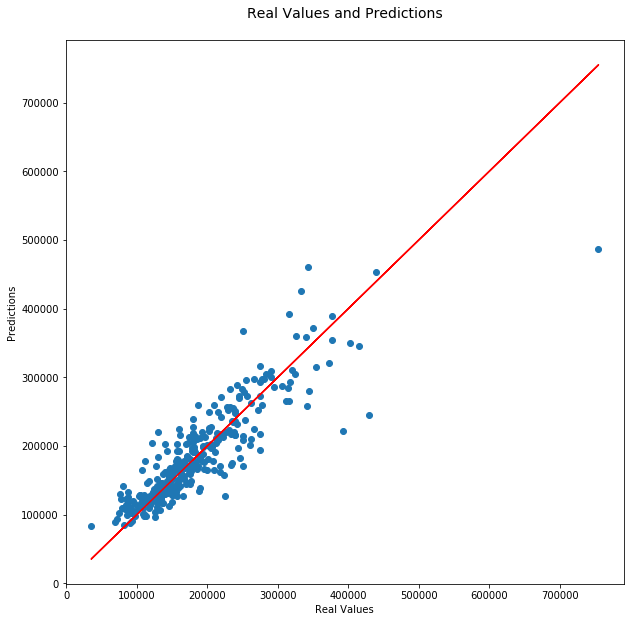

In [36]:
plt.figure(figsize=(10,10))
plt.title('Real Values and Predictions\n', size = 14)
ax1 = plt.scatter(yte, yhat)
ax3 = plt.plot(yte, yte, color="red")
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.show()

# Logistic Regression with LightGBM

In [46]:
df=pd.read_csv("ready-to-use-titanic.csv")
df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df.columns]
x=df.drop(columns="Survived")
y=df["Survived"]

In [47]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.25,random_state=0)

In [48]:
d_train = lgb.Dataset(xtr, label=ytr)

In [49]:
params = {'boosting_type' : 'gbdt',
          'objective' : 'binary',
          'metric' : 'binary_logloss',
          'sub_feature' : 0.5,
          'num_leaves' :  10,
          'min_data' : 50,
          'max_depth' : 10}

In [51]:
lgb_logistic_model = lgb.train(params, d_train, num_boost_round = 100)

In [56]:
yhat = lgb_logistic_model.predict(xte)

yhat = [0 if pred < 0.5 else 1 for pred in yhat]

In [62]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(yhat,yte)
print("we have {:.2f}% accuracy on titanic dataset with lgb".format(acc*100))

we have 80.45% accuracy on titanic dataset with lgb
